Контрольная работа 
ИТП-31 
Вариант 14 
Латышева Мария


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import random
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import zipfile

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
def print_image(x_data, y_data):
  plt.figure(figsize=(35 , 19))
  for i in range(102):
    random_position = random.randint(0, len(x_data) - 1)
    plt.subplot(6 , 17 , i + 1)
    plt.imshow(x_data[random_position])
    plt.title("Класс: {0}".format(y_data[random_position]))

In [4]:
def get_zipDataset(path_to_directory):
  zip = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/fruits.zip', 'r')
  zip.extractall('/tmp')
  zip.close()
  return os.listdir(path_to_directory)  

In [5]:
def get_Normolize_data(x_data):
  return x_data.reshape([-1, 26 * 26 * 3]) / 255.0 

In [6]:
#Функция чтения картинок и изменения размерности
def get_Images():
  path_to_directory = '/tmp/fruits'
  directory_list = get_zipDataset(path_to_directory)
  
  y_data, x_data = [], []
  for i in range(len(directory_list)):
    files_in_directory = os.listdir(path_to_directory + '/' + directory_list[i])
    for image in files_in_directory:
      img = np.asarray(Image.open(path_to_directory + '/' + directory_list[i] + '/' + image).resize((26, 26)))

      if(directory_list[i] == 'Melon Piel de Sapo'):
        y_data.append(0)
      else:
        y_data.append(1)
      x_data.append(img)
  
  print_image(x_data, y_data)
  return np.array(x_data, np.float32), np.array(y_data)

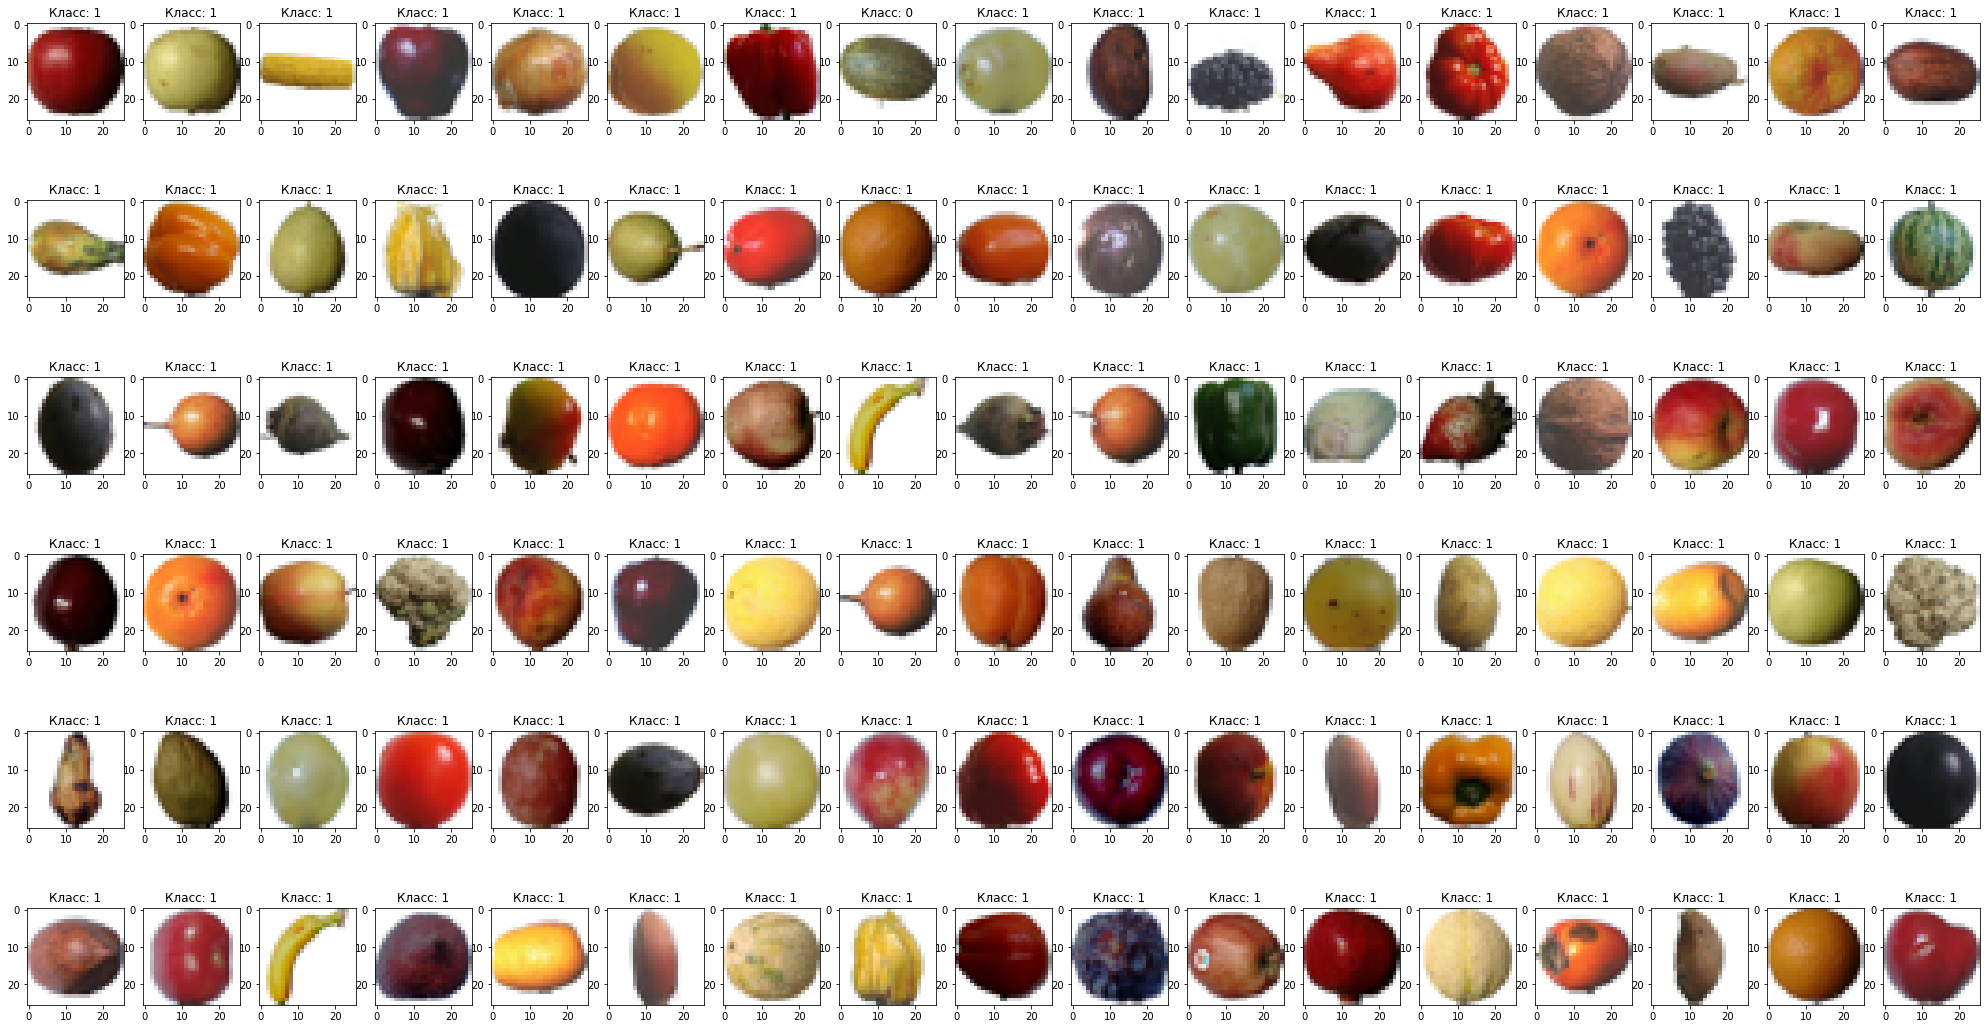

In [7]:
x_data, y_data = get_Images()
x_data = get_Normolize_data(x_data)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, test_size=0.1)

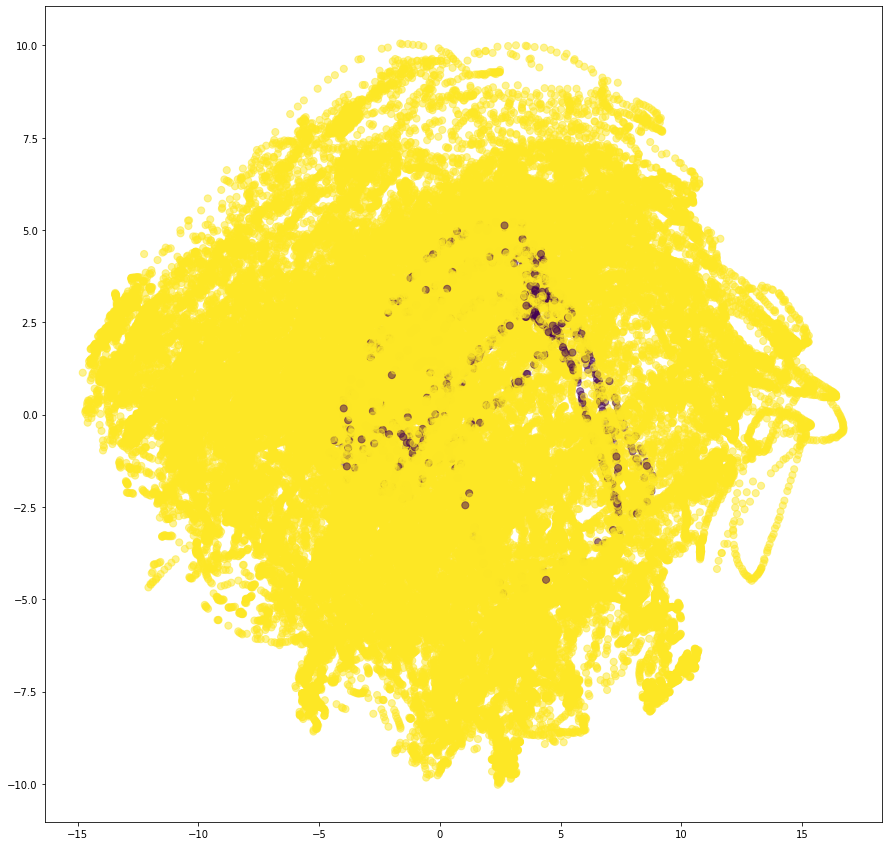

In [9]:
#PCA
pca = PCA(n_components = 2)
pca_reduce = pca.fit_transform(x_train)

pca_x1 = pca_reduce[:, 0]
pca_x2 = pca_reduce[:, 1]

plt.figure(figsize=(15, 15))
plt.scatter(pca_x1 , pca_x2, s = 50 , c = y_train , alpha = 0.5)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 81337 samples in 0.171s...
[t-SNE] Computed neighbors for 81337 samples in 944.692s...
[t-SNE] Computed conditional probabilities for sample 1000 / 81337
[t-SNE] Computed conditional probabilities for sample 2000 / 81337
[t-SNE] Computed conditional probabilities for sample 3000 / 81337
[t-SNE] Computed conditional probabilities for sample 4000 / 81337
[t-SNE] Computed conditional probabilities for sample 5000 / 81337
[t-SNE] Computed conditional probabilities for sample 6000 / 81337
[t-SNE] Computed conditional probabilities for sample 7000 / 81337
[t-SNE] Computed conditional probabilities for sample 8000 / 81337
[t-SNE] Computed conditional probabilities for sample 9000 / 81337
[t-SNE] Computed conditional probabilities for sample 10000 / 81337
[t-SNE] Computed conditional probabilities for sample 11000 / 81337
[t-SNE] Computed conditional probabilities for sample 12000 / 81337
[t-SNE] Computed conditional probabilities for 

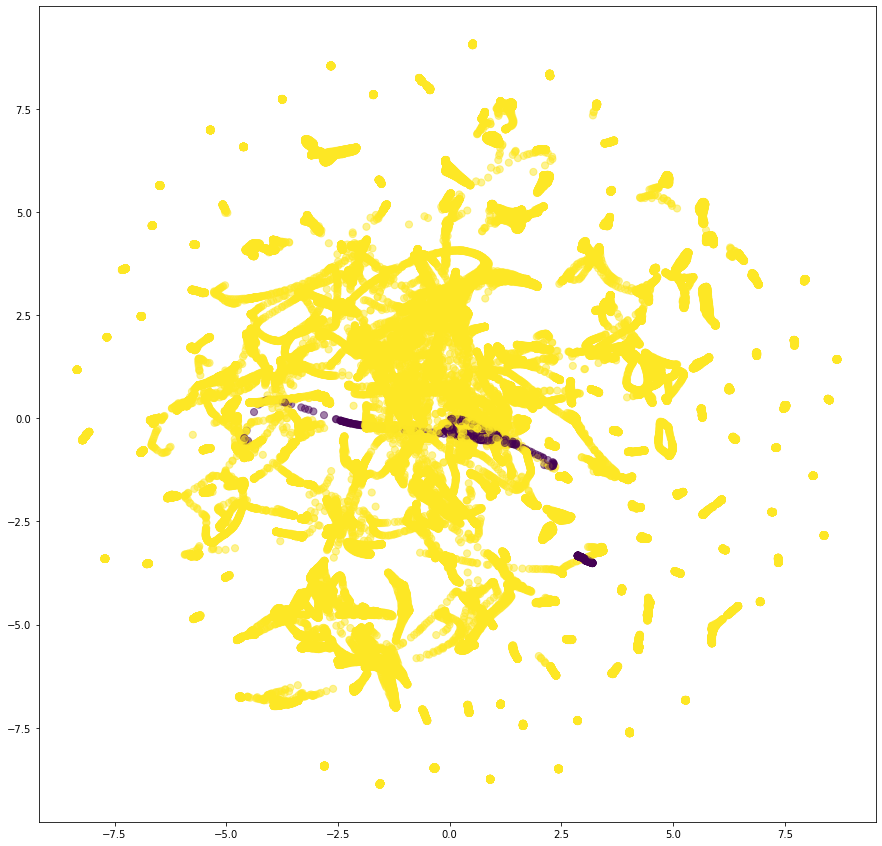

In [10]:
#TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1 , perplexity=35 , n_iter=250)
tsne_res = tsne.fit_transform(x_train)

plt.figure(figsize=(15, 15))
plt.scatter(tsne_res[:, 0] , tsne_res[:, 1] , s = 50 , c = y_train , alpha = 0.5)

SVM PCA

In [11]:
pca = PCA(n_components = 2)
pca_train = pca.fit_transform(x_train)

param_grid = { 'C': [0.1 , 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(pca_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.989 total time=   6.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.989 total time=   5.7s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.989 total time=   5.6s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.989 total time=   5.8s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.989 total time=   5.7s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   2.6s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   2.8s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   2.7s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   2.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.989 total time=   2.8s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.989 total time=   3.1s
[CV 2/5] END ................C=0.1, kernel=poly;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [12]:
pca_svm_train = 0
pca_svm_test = 0

for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, test_size=0.1)

  pca = PCA(n_components = 2).fit(x_train)
  pca_train = pca.transform(x_train)
  pca_test = pca.transform(x_test)

  svm = SVC(kernel = 'linear')
  svm.fit(pca_train , y_train)

  prediction_test = svm.predict(pca_test)
  prediction_train = svm.predict(pca_train)

  train_acc = accuracy_score(y_true = y_train , y_pred = prediction_train)
  test_acc = accuracy_score(y_true = y_test , y_pred = prediction_test)

  print("{0} iter train_value = {1}".format(i + 1, train_acc))
  print("{0} iter test_value = {1}".format(i + 1, train_acc))

  pca_svm_train += train_acc
  pca_svm_test += test_acc

print("Mean train accuracy: {0}".format(pca_svm_train / 10))
print("Mean test accuracy: {0}".format(pca_svm_test / 10))

1 iter train_value = 0.9891316375081451
1 iter test_value = 0.9891316375081451
2 iter train_value = 0.9891316375081451
2 iter test_value = 0.9891316375081451
3 iter train_value = 0.9891439320358508
3 iter test_value = 0.9891439320358508
4 iter train_value = 0.9890578703419108
4 iter test_value = 0.9890578703419108
5 iter train_value = 0.9891439320358508
5 iter test_value = 0.9891439320358508
6 iter train_value = 0.9889226305371479
6 iter test_value = 0.9889226305371479
7 iter train_value = 0.9893160554237309
7 iter test_value = 0.9893160554237309
8 iter train_value = 0.989094753925028
8 iter test_value = 0.989094753925028
9 iter train_value = 0.9890701648696165
9 iter test_value = 0.9890701648696165
10 iter train_value = 0.9889841031756765
10 iter test_value = 0.9889841031756765
Mean train accuracy: 0.9890996717361104
Mean test accuracy: 0.9892232794866119


SVM без PCA

In [13]:
param_grid = {
    'kernel': ['rbf', 'linear', 'poly']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

print("Лучшее ядро без pca: {0}".format(grid.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................kernel=rbf;, score=1.000 total time= 2.0min
[CV 2/5] END ........................kernel=rbf;, score=1.000 total time= 1.9min
[CV 3/5] END ........................kernel=rbf;, score=1.000 total time= 2.0min
[CV 4/5] END ........................kernel=rbf;, score=1.000 total time= 1.9min
[CV 5/5] END ........................kernel=rbf;, score=1.000 total time= 2.0min
[CV 1/5] END .....................kernel=linear;, score=1.000 total time= 1.2min
[CV 2/5] END .....................kernel=linear;, score=1.000 total time= 1.2min
[CV 3/5] END .....................kernel=linear;, score=1.000 total time= 1.2min
[CV 4/5] END .....................kernel=linear;, score=1.000 total time= 1.2min
[CV 5/5] END .....................kernel=linear;, score=1.000 total time= 1.3min
[CV 1/5] END .......................kernel=poly;, score=1.000 total time= 1.1min
[CV 2/5] END .......................kernel=poly;,

In [14]:
svm_train = 0
svm_test = 0

for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.9, test_size=0.1)

  svm = SVC(kernel = 'poly')
  svm.fit(x_train , y_train)

  prediction_test = svm.predict(x_test)
  prediction_train = svm.predict(x_train)

  train_acc = accuracy_score(y_true = y_train , y_pred = prediction_train)
  test_acc = accuracy_score(y_true = y_test , y_pred = prediction_test)

  print("{0} iter train_value = {1}".format(i + 1, train_acc))
  print("{0} iter test_value = {1}".format(i + 1, train_acc))

  svm_train += train_acc
  svm_test += test_acc

print("Mean train accuracy: {0}".format(svm_train / 10))
print("Mean test accuracy: {0}".format(svm_test / 10))

1 iter train_value = 1.0
1 iter test_value = 1.0
2 iter train_value = 1.0
2 iter test_value = 1.0
3 iter train_value = 1.0
3 iter test_value = 1.0
4 iter train_value = 1.0
4 iter test_value = 1.0
5 iter train_value = 1.0
5 iter test_value = 1.0
6 iter train_value = 1.0
6 iter test_value = 1.0
7 iter train_value = 1.0
7 iter test_value = 1.0
8 iter train_value = 1.0
8 iter test_value = 1.0
9 iter train_value = 1.0
9 iter test_value = 1.0
10 iter train_value = 1.0
10 iter test_value = 1.0
Mean train accuracy: 1.0
Mean test accuracy: 1.0
